# 更多的数据效果会不会更好呢？


In [1]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as a dataframe
features = pd.read_csv('data/temps_extended.csv')
features.head(5)

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


* ws_1：前一天的风速
* prcp_1: 前一天的降水
* snwd_1：前一天的积雪深度

In [2]:
print('We have {} days of data with {} variables.'.format(*features.shape))

We have 2191 days of data with 12 variables.


## Numerical and Visual Inspection of Data

In [3]:
round(features.describe(), 2)

TypeError: a float is required

In [4]:
# Use datetime for dealing with dates
import datetime

# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

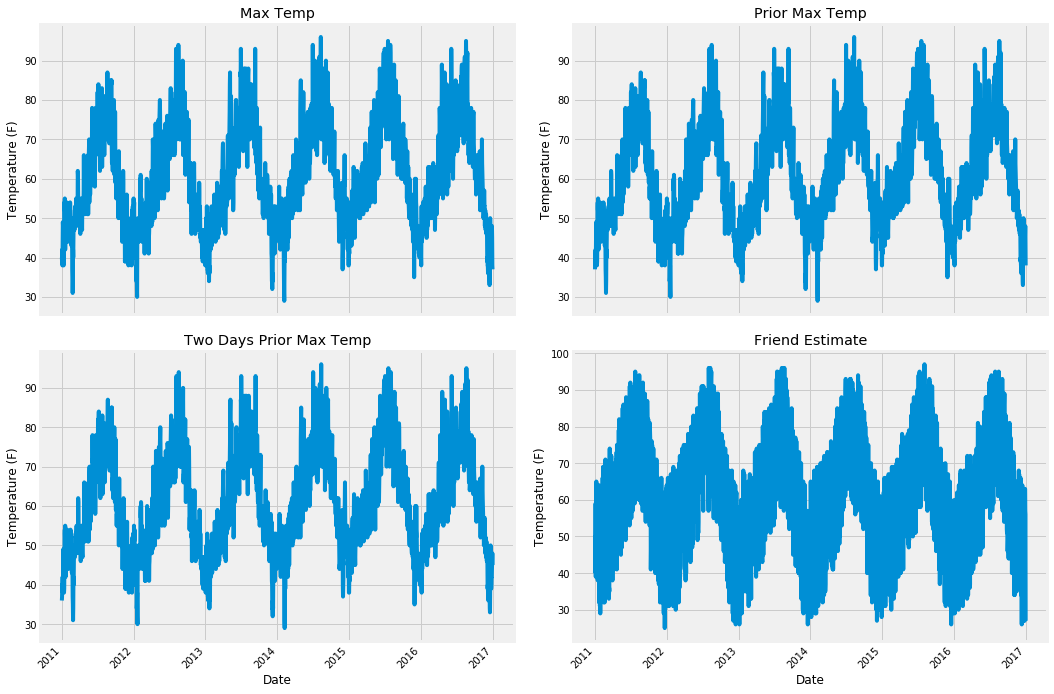

In [5]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature (F)'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature (F)'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

再来看看新的特征

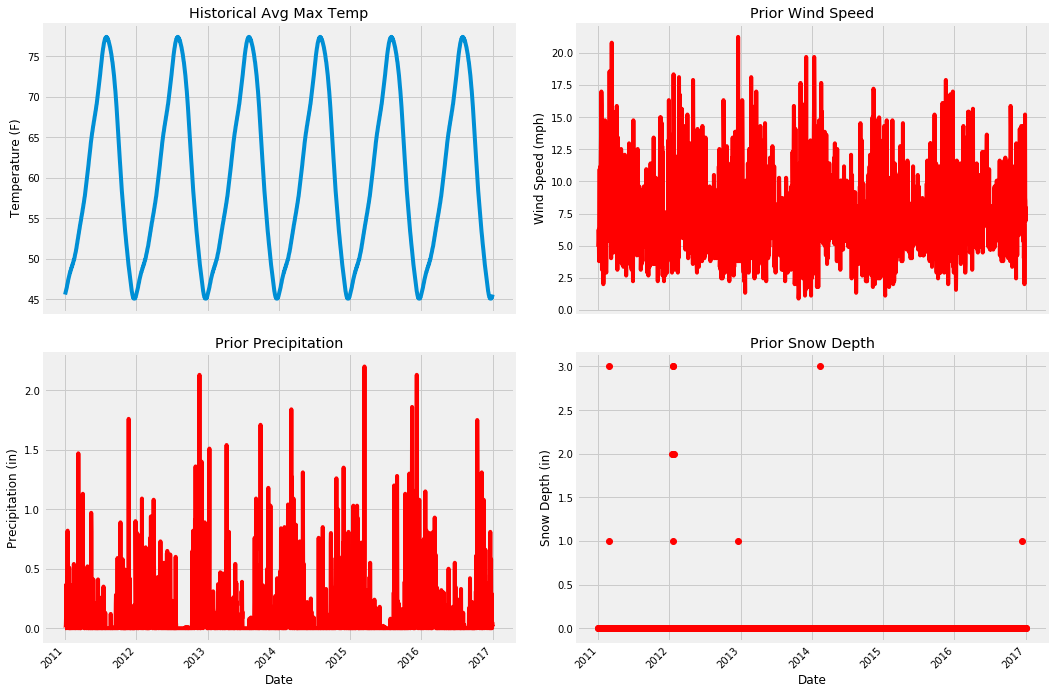

In [6]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Historical Average Max Temp
ax1.plot(dates, features['average'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Historical Avg Max Temp')

# Prior Avg Wind Speed 
ax2.plot(dates, features['ws_1'], 'r-')
ax2.set_xlabel(''); ax2.set_ylabel('Wind Speed (mph)'); ax2.set_title('Prior Wind Speed')

# Prior Precipitation
ax3.plot(dates, features['prcp_1'], 'r-')
ax3.set_xlabel('Date'); ax3.set_ylabel('Precipitation (in)'); ax3.set_title('Prior Precipitation')

# Prior Snowdepth
ax4.plot(dates, features['snwd_1'], 'ro')
ax4.set_xlabel('Date'); ax4.set_ylabel('Snow Depth (in)'); ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)

## Pairplots

最简单实用的！用它来看看这些特征有没有啥用呢！

In [7]:
# Create columns of seasons for pair plotting colors
seasons = []

for month in features['month']:
    if month in [1, 2, 12]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')

# Will only use six variables for plotting pairs
reduced_features = features[['temp_1', 'prcp_1', 'average', 'actual']]
reduced_features['season'] = seasons

C:\Users\dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


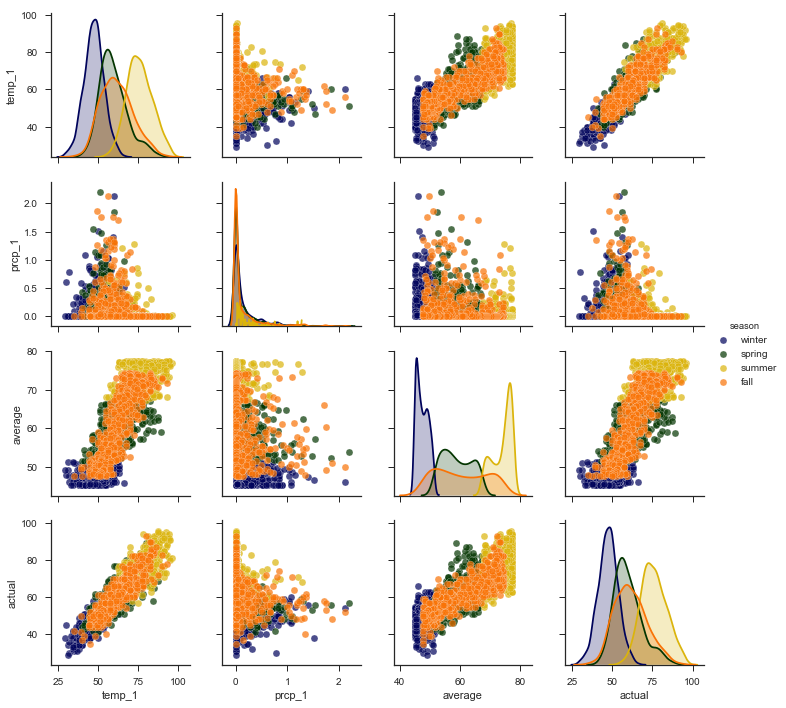

In [8]:
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

temp_1和average都有着比较强的关系跟真实情况

## 数据预处理

In [9]:
# One Hot Encoding
features = pd.get_dummies(features)

# Extract features and labels
labels = features['actual']
features = features.drop('actual', axis = 1)

# List of features for later use
feature_list = list(features.columns)

# Convert to numpy arrays
import numpy as np

features = np.array(features)
labels = np.array(labels)

# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (1643L, 17L))
('Training Labels Shape:', (1643L,))
('Testing Features Shape:', (548L, 17L))
('Testing Labels Shape:', (548L,))


## 先来看看老数据的结果

In [11]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
original_features = pd.read_csv('data/temps.csv')
original_features = pd.get_dummies(original_features)

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
original_labels = np.array(original_features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
original_features= original_features.drop('actual', axis = 1)

# Saving feature names for later use
original_feature_list = list(original_features.columns)

# Convert to numpy array
original_features = np.array(original_features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(original_train_features, original_train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(original_test_features)

# Calculate the absolute errors
errors = abs(predictions - original_test_labels)

# Print out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / original_test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Average model error:', 3.83, 'degrees.')
('Accuracy:', 93.99, '%.')


## 新数据来了，只增大数据量的话，结果会提升吗

In [12]:
from sklearn.ensemble import RandomForestRegressor
# Find the original feature indices 
original_feature_indices = [feature_list.index(feature) for feature in
                                      feature_list if feature not in
                                      ['ws_1', 'prcp_1', 'snwd_1']]

# Create a test set of the original features
original_train_features = train_features[:,original_feature_indices]

original_test_features = test_features[:, original_feature_indices]

rf = RandomForestRegressor(n_estimators= 100, random_state=42)

rf.fit(original_train_features, train_labels);

# Make predictions on test data using the model trained on original data
baseline_predictions = rf.predict(original_test_features)

# Performance metrics
baseline_errors = abs(baseline_predictions - test_labels)

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(baseline_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
baseline_mape = 100 * np.mean((baseline_errors / test_labels))

# Calculate and display accuracy
baseline_accuracy = 100 - baseline_mape
print('Accuracy:', round(baseline_accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
('Average absolute error:', 3.75, 'degrees.')
('Accuracy:', 93.7, '%.')


## 加入新特征再来看一看

In [33]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

rf_exp = RandomForestRegressor(n_estimators= 100, random_state=42)
rf_exp.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [34]:
# Make predictions on test data
predictions = rf_exp.predict(test_features)

# Performance metrics
errors = abs(predictions - test_labels)

print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Compare to baseline
improvement_baseline = 100 * abs(mape - baseline_mape) / baseline_mape
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 3.7162 degrees.
Improvement over baseline: 0.48 %.
Accuracy: 93.73 %.


数据还是多点好！

# 特征降维：不要贪的太多！有些并不会使我们的效果变好

### Feature Importances

In [35]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.83
Variable: average              Importance: 0.06
Variable: ws_1                 Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: friend               Importance: 0.02
Variable: year                 Importance: 0.01
Variable: month                Importance: 0.01
Variable: day                  Importance: 0.01
Variable: prcp_1               Importance: 0.01
Variable: snwd_1               Importance: 0.0
Variable: weekday_Fri          Importance: 0.0
Variable: weekday_Mon          Importance: 0.0
Variable: weekday_Sat          Importance: 0.0
Variable: weekday_Sun          Importance: 0.0
Variable: weekday_Thurs        Importance: 0.0
Variable: weekday_Tues         Importance: 0.0
Variable: weekday_Wed          Importance: 0.0


#### Visualize Feature Importances

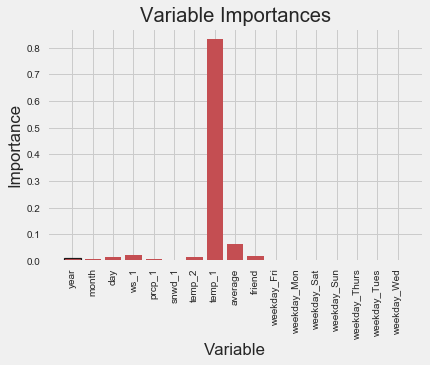

In [36]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## 特征重要性累加，看看95%之前有多少个

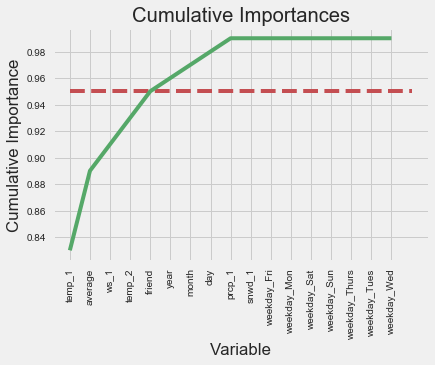

In [38]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

### 把他们列出来吧！

In [39]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 6


## 训练集和测试集要使用一样的

In [41]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:6]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)


Important train features shape: (1643, 6)
Important test features shape: (548, 6)


### 有这些重要的重新训练

In [42]:
# Train the expanded model on only the important features
rf_exp.fit(important_train_features, train_labels);

### 瞅瞅咋样吧！

In [43]:
# Make predictions on test data
predictions = rf_exp.predict(important_test_features)

# Performance metrics
errors = abs(predictions - test_labels)

print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 3.8288 degrees.
Accuracy: 93.56 %.


效果反而下降了，其实随机森林的算法本身就会考虑特征的问题，会优先选择有价值的，我们认为的去掉一些，相当于可供候选的就少了，出现这样的现象在随机森林中并不奇怪！

## 计算下 Trade-Offs

In [45]:
# Use time library for run time evaluation
import time

# All features training and testing time
all_features_time = []

# Do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(train_features, train_labels)
    all_features_predictions = rf_exp.predict(test_features)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('All features total training and testing time:', round(all_features_time, 2), 'seconds.')

All features total training and testing time: 0.49 seconds.


In [46]:
# Time training and testing for reduced feature set
reduced_features_time = []

# Do 10 iterations and take average
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(important_train_features, train_labels)
    reduced_features_predictions = rf_exp.predict(important_test_features)
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)

reduced_features_time = np.mean(reduced_features_time)
print('Reduced features total training and testing time:', round(reduced_features_time, 2), 'seconds.')

Reduced features total training and testing time: 0.33 seconds.


### Accuracy vs Run-Time

In [47]:
all_accuracy =  100 * (1- np.mean(abs(all_features_predictions - test_labels) / test_labels))
reduced_accuracy = 100 * (1- np.mean(abs(reduced_features_predictions - test_labels) / test_labels))

comparison = pd.DataFrame({'features': ['all (17)', 'reduced (5)'], 
                           'run_time': [round(all_features_time, 2), round(reduced_features_time, 2)],
                           'accuracy': [round(all_accuracy, 2), round(reduced_accuracy, 2)]})

comparison[['features', 'accuracy', 'run_time']]

,features,accuracy,run_time
0,all (17),93.73,0.49
1,reduced (5),93.56,0.33


实际中我们也得综合来考虑下性能问题！时间速度别跟我机器比。。。我是专业吃鸡主机！

In [48]:
relative_accuracy_decrease = 100 * (all_accuracy - reduced_accuracy) / all_accuracy
print('Relative decrease in accuracy:', round(relative_accuracy_decrease, 3), '%.')

relative_runtime_decrease = 100 * (all_features_time - reduced_features_time) / all_features_time
print('Relative decrease in run time:', round(relative_runtime_decrease, 3), '%.')

Relative decrease in accuracy: 0.186 %.
Relative decrease in run time: 33.197 %.


性价比！！！

# Concluding Graphs

In [51]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
original_features = pd.read_csv('data/temps.csv')
original_features = pd.get_dummies(original_features)

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
original_labels = np.array(original_features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
original_features= original_features.drop('actual', axis = 1)

# Saving feature names for later use
original_feature_list = list(original_features.columns)

# Convert to numpy array
original_features = np.array(original_features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)

In [52]:
# Find the original feature indices 
original_feature_indices = [feature_list.index(feature) for feature in
                                      feature_list if feature not in
                                      ['ws_1', 'prcp_1', 'snwd_1']]

# Create a test set of the original features
original_test_features = test_features[:, original_feature_indices]

# Time to train on original data set (1 year)
original_features_time = []

# Do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf.fit(original_train_features, original_train_labels)
    original_features_predictions = rf.predict(original_test_features)
    end_time = time.time()
    original_features_time.append(end_time - start_time)
    
original_features_time = np.mean(original_features_time)

In [53]:
# Calculate mean absolute error for each model
original_mae = np.mean(abs(original_features_predictions - test_labels))
exp_all_mae = np.mean(abs(all_features_predictions - test_labels))
exp_reduced_mae = np.mean(abs(reduced_features_predictions - test_labels))

# Calculate accuracy for model trained on 1 year of data
original_accuracy = 100 * (1 - np.mean(abs(original_features_predictions - test_labels) / test_labels))

# Create a dataframe for comparison
model_comparison = pd.DataFrame({'model': ['original', 'exp_all', 'exp_reduced'], 
                                 'error (degrees)':  [original_mae, exp_all_mae, exp_reduced_mae],
                                 'accuracy': [original_accuracy, all_accuracy, reduced_accuracy],
                                 'run_time (s)': [original_features_time, all_features_time, reduced_features_time]})

# Order the dataframe
model_comparison = model_comparison[['model', 'error (degrees)', 'accuracy', 'run_time (s)']]

In [54]:
model_comparison

,model,error (degrees),accuracy,run_time (s)
0,original,4.255018,92.573850,0.102373
1,exp_all,3.716241,93.730083,0.488399
2,exp_reduced,3.828832,93.555398,0.326267


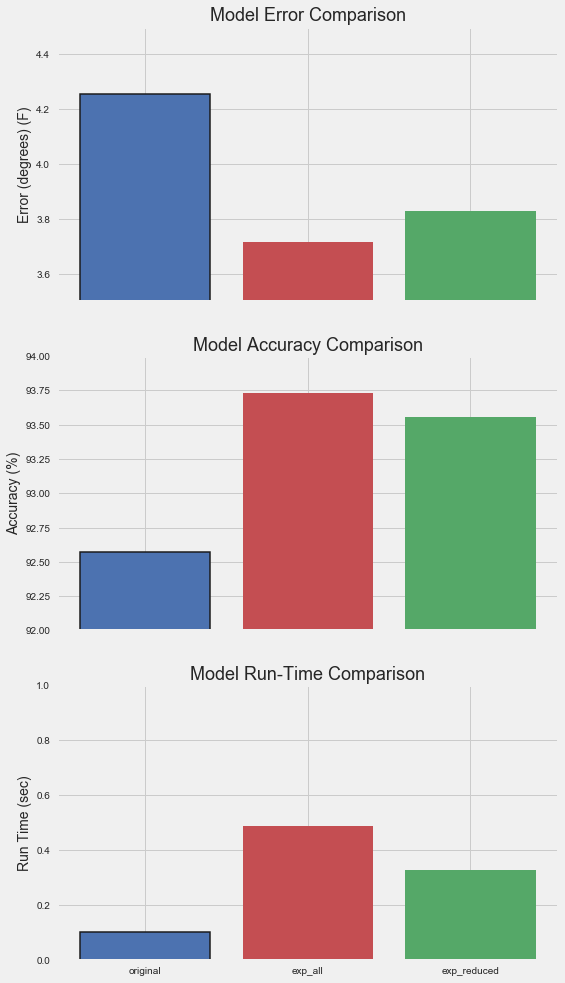

In [57]:
# Make plots 
# Set up the plotting layout
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize = (8,16), sharex = True)

# Set up x-axis
x_values = [0, 1, 2]
labels = list(model_comparison['model'])
plt.xticks(x_values, labels)

# Set up fonts
fontdict = {'fontsize': 18}
fontdict_yaxis = {'fontsize': 14}

# Error Comparison
ax1.bar(x_values, model_comparison['error (degrees)'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax1.set_ylim(bottom = 3.5, top = 4.5)
ax1.set_ylabel('Error (degrees) (F)', fontdict = fontdict_yaxis); 
ax1.set_title('Model Error Comparison', fontdict= fontdict)

# Accuracy Comparison
ax2.bar(x_values, model_comparison['accuracy'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax2.set_ylim(bottom = 92, top = 94)
ax2.set_ylabel('Accuracy (%)', fontdict = fontdict_yaxis); 
ax2.set_title('Model Accuracy Comparison', fontdict= fontdict)

# Run Time Comparison
ax3.bar(x_values, model_comparison['run_time (s)'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax3.set_ylim(bottom = 0, top = 1)
ax3.set_ylabel('Run Time (sec)', fontdict = fontdict_yaxis); 
ax3.set_title('Model Run-Time Comparison', fontdict= fontdict);
